# Data Preprocessing and EDA

In [1]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Loading Data

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renaming Columns

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1528,1,27.0,36800.0,1,0
639,1,21.0,40800.0,1,0
4023,1,40.0,34800.0,2,0
2026,1,40.0,44500.0,0,0
3894,0,21.0,41700.0,2,0
623,1,41.0,18700.0,1,0
3042,1,40.0,55200.0,1,0
4422,0,30.0,24200.0,2,0
3252,1,35.0,41700.0,1,0
772,1,20.0,65100.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# podemos querer corrigir o tipo de idade (de float para int), embora isso não seja crítico

# escreva sua conversão aqui se você escolher:
df["age"] = df["age"].astype("int")

In [8]:
# verifique se a conversão foi bem-sucedida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# agora dê uma olhada nas estatísticas descritivas dos dados.
# Parece que está tudo bem?

In [10]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Conclusion:

- All data is numeric, which is necessary for performing regression modeling.
- The different features vary in different scales, so we will need to scale the data during modeling.
- "Insurance benefits" ranges from 0 to 5, not 0 to 1, indicating that up to 5 types of benefits are considered, rather than a binary value of 0 or 1.
- There are no missing or duplicate values.

## EDA

Let's check for customer groups using pairplot

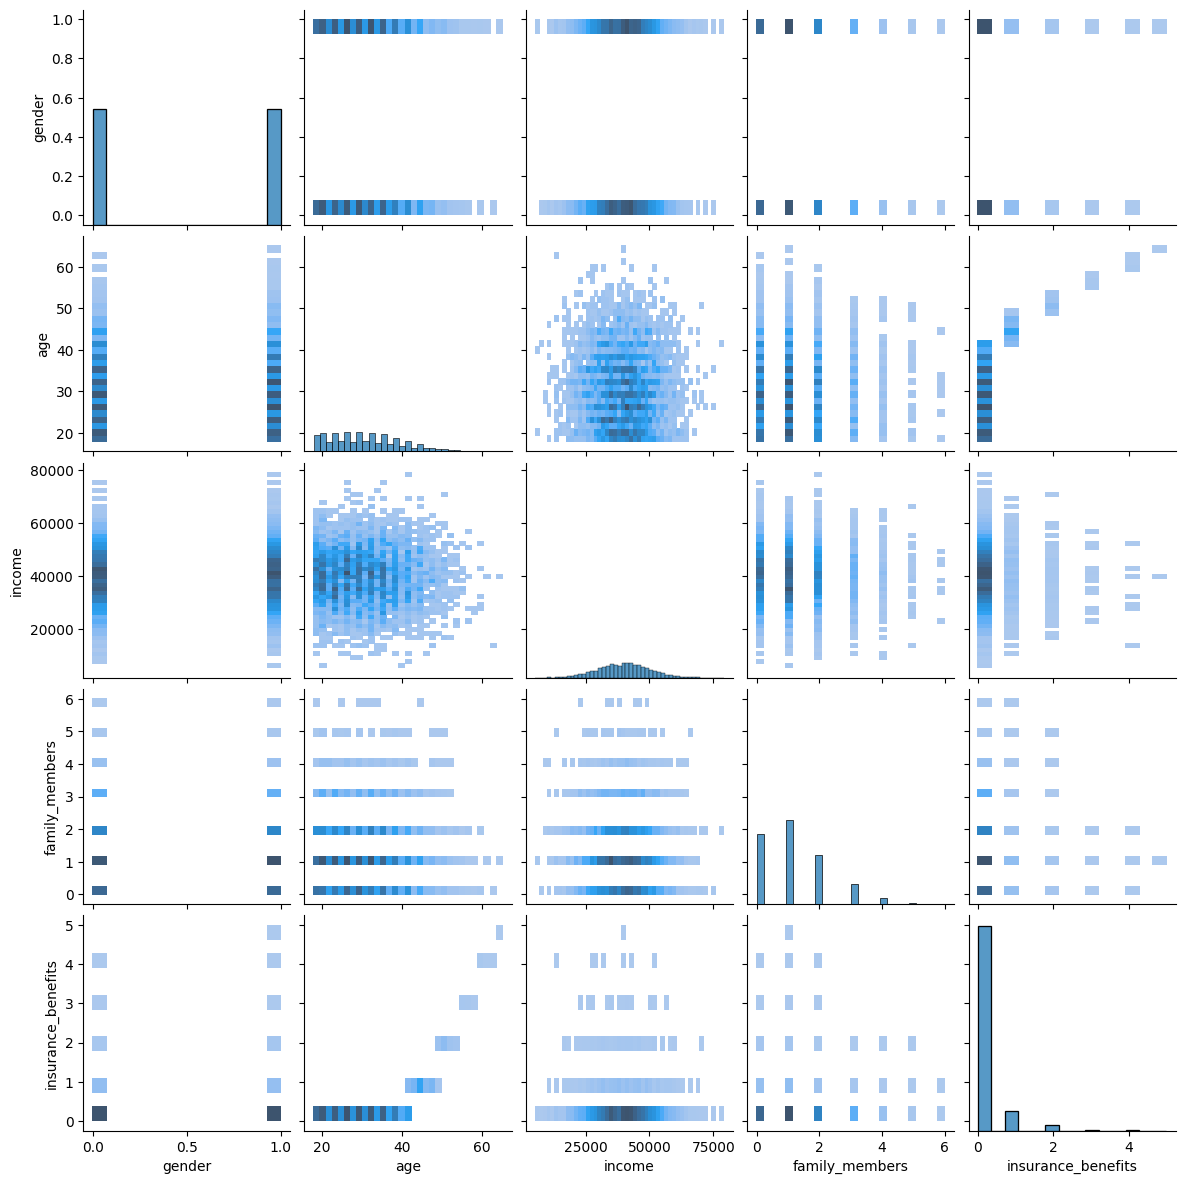

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it's a bit challenging to identify obvious groups (clusters) since it's difficult to combine multiple variables simultaneously (to analyze multivariate distributions). That's where Linear Algebra and Machine Learning can be quite helpful.

# Task 1 Similar Customers

# k-Nearest Neighbors (kNN) Function for Client Segmentation

## Objective
Create a function that returns the k-nearest neighbors for a given n-th object based on a specified distance metric. The task focuses on segmenting clients without considering the number of insurance payouts received.

## Steps
### Step 1: Implement the kNN Algorithm
- Use the ready-made implementation from scikit-learn ([see the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)).
- Create a custom implementation of the kNN algorithm from scratch.

### Step 2: Test the Function
Test the kNN function across four combinations to understand the impact of scalability and distance metrics on model performance:
#### 1. Scalability
   - **Non-scaled Data**: Use the original dataset without applying any scaling.
   - **Scaled Data**: Use [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) from scikit-learn to scale the data, ensuring all feature values fall between -1 and 1.
   
#### 2. Distance Metrics
   - **Euclidean Distance**: Measure the straight-line distance between two points in a multi-dimensional space.
   - **Manhattan Distance**: Calculate the sum of the absolute differences between the coordinates of two points.

### Step 3: Analyze the Results


#### Impact of Non-Scaled Data on kNN
- How does non-scaled data affect the performance of the kNN algorithm?
  - If there is an impact, explain how the algorithm's performance or accuracy is influenced by the lack of scaling.

#### Similarity of Results Using the Manhattan Distance
- Compare results using the Manhattan distance metric (regardless of whether the data is scaled).
  - How similar are the outcomes when using this distance metric? Discuss any patterns or differences observed.


In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
from sklearn.neighbors import NearestNeighbors

def get_knn(df, n, k, metric):
    
    """
    Retorna os vizinhos mais próximos de k

    :param df: DataFrame pandas usado para encontrar objetos semelhantes dentro de    
    :param n: número do objeto pelo qual os vizinhos mais próximos são procurados
    :param k: o número dos vizinhos mais próximos a serem retornados
    :param metric: nome da métrica de distância    """

    nbrs = NearestNeighbors(n_neighbors=k,metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3433,0.0,0.461538,0.327848,0.000000,0
3996,1.0,0.769231,0.520253,0.166667,2
87,0.0,0.430769,0.581013,0.000000,0
2038,0.0,0.446154,0.605063,0.000000,0
410,0.0,0.492308,0.502532,0.166667,0


Finding similar records to a particular record for each combination

In [17]:
import random

k = 5
n = random.randint(0,len(df))

metrics = ["euclidean", "manhattan"]
dfs = [df,df_scaled]

for metric in metrics:
    for dataframe in dfs:
        k_neighbors = get_knn(dataframe,n,k,metric)
        print(f'Distância: {metric}, Scaled? {"Sim" if dataframe is df_scaled else "Não"}')
        display(k_neighbors)

Distância: euclidean, Scaled? Não


,gender,age,income,family_members,insurance_benefits,distance
2784,1,25,44300.0,0,0,0.000000
2075,1,24,44300.0,1,0,1.414214
3195,0,26,44300.0,1,0,1.732051
3288,1,24,44300.0,2,0,2.236068
4072,1,27,44300.0,1,0,2.236068


Distância: euclidean, Scaled? Sim


,gender,age,income,family_members,insurance_benefits,distance
2784,1.0,0.384615,0.560759,0.0,0,0.000000
138,1.0,0.384615,0.568354,0.0,0,0.007595
4633,1.0,0.384615,0.548101,0.0,0,0.012658
239,1.0,0.400000,0.559494,0.0,0,0.015437
1669,1.0,0.369231,0.558228,0.0,0,0.015592


Distância: manhattan, Scaled? Não


,gender,age,income,family_members,insurance_benefits,distance
2784,1,25,44300.0,0,0,0.0
2075,1,24,44300.0,1,0,2.0
3195,0,26,44300.0,1,0,3.0
3288,1,24,44300.0,2,0,3.0
4072,1,27,44300.0,1,0,3.0


Distância: manhattan, Scaled? Sim


,gender,age,income,family_members,insurance_benefits,distance
2784,1.0,0.384615,0.560759,0.0,0,0.000000
138,1.0,0.384615,0.568354,0.0,0,0.007595
4633,1.0,0.384615,0.548101,0.0,0,0.012658
239,1.0,0.400000,0.559494,0.0,0,0.016650
1669,1.0,0.369231,0.558228,0.0,0,0.017916


Respostas para as perguntas

Conclusion:

- Non-scaled data does affect the kNN algorithm. When we scale the data, the results of kNN change, meaning the nearest neighbors identified are different. 
- The change is most noticeable when comparing scaled vs. non-scaled data. However, when comparing different distance metrics (Euclidean vs. Manhattan), the nearest neighbors tend to remain the same.

# Task 2 - Is it likely that a customer will receive an insurance payout?

In [38]:
# calcule a meta
df['insurance_benefits_received'] = np.where(df["insurance_benefits"] > 0,1,0)
# df["insurance_benefits_received"] = (df["insurance_benefits"]> 0).astype('int')

In [39]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
4726,1,19,31700.0,1,0,0
1935,0,45,43600.0,1,1,1
2681,0,29,37600.0,0,0,0
45,0,24,30400.0,1,0,0
2457,0,41,42400.0,1,0,0
4324,1,28,33100.0,0,0,0
2369,1,30,55400.0,1,0,0
2833,0,27,46500.0,1,0,0
82,0,31,37400.0,2,0,0
2818,0,52,40700.0,0,2,1


In [29]:
# verifique o desequilíbrio de classe com value_counts()
print(df["insurance_benefits_received"].value_counts())

0    4436
1     564
Name: insurance_benefits_received, dtype: int64


In [40]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# se você tiver um problema com a linha a seguir, reinicie o kernel e execute o caderno novamente
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de Confusão')
    print(cm)

In [41]:
# gerando saída de um modelo aleatório

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [42]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'A probabilidade: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,df.shape[0])
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

A probabilidade: 0.00
F1: 0.00
Matriz de Confusão
[[0.8872 0.    ]
 [0.1128 0.    ]]

A probabilidade: 0.11
F1: 0.12
Matriz de Confusão
[[0.7914 0.0958]
 [0.0994 0.0134]]

A probabilidade: 0.50
F1: 0.20
Matriz de Confusão
[[0.456  0.4312]
 [0.053  0.0598]]

A probabilidade: 1.00
F1: 0.20
Matriz de Confusão
[[0.     0.8872]
 [0.     0.1128]]



In [49]:
from sklearn.neighbors import KNeighborsClassifier

# rodando o modelo com dados originais, não escalonados
features = df[feature_names]
target = df["insurance_benefits_received"]

features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=.3, random_state=12345)

for k in range(1, 11):
    print(f"K: {k}")
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train,target_train)
    predictions = model.predict(features_valid)
    eval_classifier(target_valid,predictions)
    print()

K: 1
F1: 0.61
Matriz de Confusão
[[0.87       0.02133333]
 [0.052      0.05666667]]

K: 2
F1: 0.41
Matriz de Confusão
[[0.88733333 0.004     ]
 [0.08       0.02866667]]

K: 3
F1: 0.41
Matriz de Confusão
[[0.88       0.01133333]
 [0.078      0.03066667]]

K: 4
F1: 0.28
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.09066667 0.018     ]]

K: 5
F1: 0.27
Matriz de Confusão
[[0.88533333 0.006     ]
 [0.09066667 0.018     ]]

K: 6
F1: 0.11
Matriz de Confusão
[[0.89       0.00133333]
 [0.102      0.00666667]]

K: 7
F1: 0.11
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.102      0.00666667]]

K: 8
F1: 0.07
Matriz de Confusão
[[0.89133333 0.        ]
 [0.10466667 0.004     ]]

K: 9
F1: 0.08
Matriz de Confusão
[[0.89133333 0.        ]
 [0.104      0.00466667]]

K: 10
F1: 0.00
Matriz de Confusão
[[0.89133333 0.        ]
 [0.10866667 0.        ]]



In [50]:
# rodando o modelo com dados escalonados
features = df_scaled[feature_names]
target = df["insurance_benefits_received"]

features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=.3, random_state=12345)

for k in range(1, 11):
    print(f"K: {k}")
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train,target_train)
    predictions = model.predict(features_valid)
    eval_classifier(target_valid,predictions)
    print()

K: 1
F1: 0.97
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.00466667 0.104     ]]

K: 2
F1: 0.93
Matriz de Confusão
[[8.90666667e-01 6.66666667e-04]
 [1.40000000e-02 9.46666667e-02]]

K: 3
F1: 0.95
Matriz de Confusão
[[0.88933333 0.002     ]
 [0.00866667 0.1       ]]

K: 4
F1: 0.91
Matriz de Confusão
[[0.88933333 0.002     ]
 [0.01666667 0.092     ]]

K: 5
F1: 0.92
Matriz de Confusão
[[0.88666667 0.00466667]
 [0.01133333 0.09733333]]

K: 6
F1: 0.90
Matriz de Confusão
[[0.89       0.00133333]
 [0.018      0.09066667]]

K: 7
F1: 0.92
Matriz de Confusão
[[0.88733333 0.004     ]
 [0.01266667 0.096     ]]

K: 8
F1: 0.90
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.01733333 0.09133333]]

K: 9
F1: 0.92
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.01466667 0.094     ]]

K: 10
F1: 0.88
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.02133333 0.08733333]]



Conclusion: The model achieves a better F1-score when using scaled data, with k=1 resulting in an F1-score of 0.97 and k=3 yielding 0.95. For non-scaled data, the best F1-score achieved was 0.61 with k=1.

# Task 3 - Regression

In [63]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y) # w é o weight nas equações acima
        
    def predict(self, X):
        
        # somando as unidades
        X2 = np.append(np.ones([len(X),1]),X,axis=1) # modificando para incluir parâmetro b da equação linear
        y_pred = X2 @ self.weights
        
        return y_pred

In [64]:
import math

def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'REQM: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [65]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
REQM: 0.34
R2: 0.66


Conclusion: The RMSE of our regression model is 0.34, with an R² score of 0.66.

# Task 4 - Data Obfuscation

In [66]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [67]:
X = df_pn.to_numpy()

Generating a random matrix

In [68]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking if matrix can be inverted

In [69]:
# verificando se é invertível (determinante != 0)
np.linalg.det(P)

0.24339135998015463

In [70]:
# Multiplicando a matriz invertida por P para ofuscar os dados
X_inv = X.dot(P)

In [71]:
# convertendo o array de volta para dataframe
df_X_inv = pd.DataFrame(X_inv,columns=personal_info_column_list)

In [73]:
# juntando os data frames para ver como ficou
display(pd.concat([df_pn[["age","income"]],df_X_inv[["age","income"]]],axis=1).sample(10))

,age,income,age,income
3183,33,39000.0,17600.538162,14488.014212
2304,39,51500.0,23233.747835,19126.226111
3573,30,35800.0,16154.346887,13298.705471
3985,33,39100.0,17645.192873,14525.509198
4537,22,29800.0,13445.049043,11068.271622
4193,26,38700.0,17455.301978,14369.673170
3529,51,42400.0,19146.559385,15761.512950
1710,22,50900.0,22946.930692,18890.807921
4119,35,56400.0,25436.736441,20940.091870
1743,29,31700.0,14305.527279,11776.370420


Conclusion: After obfuscation we can't identify customer age or income

Reversing the procedure to retrieve customer data 

In [74]:
# calculando a inversa de P
P_inv = np.linalg.inv(P)

In [76]:
# multiplicando a invesa de P pela inversa de X para retornar aos valores originais
X_original = X_inv @ P_inv

In [78]:
# convertendo o array de volta para dataframe
df_orig = pd.DataFrame(X_original,columns=personal_info_column_list)

In [80]:
# juntando os data frames para ver se ficou igual
pd.concat([df_orig[["age","income"]],df_pn[["age","income"]]],axis=1).sample(10)

,age,income,age,income
1570,37.0,22800.0,37,22800.0
1154,36.0,30600.0,36,30600.0
3376,26.0,31100.0,26,31100.0
1312,37.0,27000.0,37,27000.0
4040,26.0,29800.0,26,29800.0
2898,41.0,58400.0,41,58400.0
2682,38.0,43000.0,38,43000.0
1755,31.0,42100.0,31,42100.0
4787,19.0,33000.0,19,33000.0
1615,18.0,41200.0,18,41200.0


In [82]:
pd.concat([df_pn,df_X_inv,df_orig],axis=1).head().round(2).astype('int')

,gender,age,income,family_members,gender,age,income,family_members,gender,age,income,family_members
0,1,41,49600,1,6359,22380,18424,46000,1,41,49600,1
1,0,46,38000,1,4873,17160,14125,35253,0,46,38000,1
2,0,29,21000,0,2693,9486,7808,19484,0,29,21000,0
3,0,21,41700,2,5345,18803,15479,38663,0,21,41700,2
4,1,28,26100,0,3347,11782,9700,24211,1,28,26100,0


## Testing linear regression with data obfuscation

In [92]:
# trazendo de volta o modelo de regressão nos dados nao-ofuscados
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits_received'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

REQM: 0.23
R2: 0.66


In [93]:
# gerando a matriz P aleatória invertível
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [94]:
# gerando nova matriz de características e alterando conjunto de treino e teste para X
X_1 = X @ P
X_train_1 = X_train @ P
X_test_1 = X_test @ P

In [95]:
# rodando regressão para dados ofuscados

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_1,y_train)
y_test_pred = lr.predict(X_test_1)
eval_regressor(y_test,y_test_pred)

REQM: 0.23
R2: 0.66


Conclusion: The RMSE and R² scores are the same for both the normal and obfuscated data, indicating that data obfuscation does not alter the regression analysis.